In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#2022 brfss_dataset
# brfss_dataset_path = r"C:\Users\idhan\Downloads\pfas_health_issues\data\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20240828.csv"

In [3]:
#2024 brfss_dataset
brfss_dataset_path = r"C:\Users\idhan\Downloads\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20241030.csv"

In [4]:
brfss_dataset = pd.read_csv(brfss_dataset_path)

In [5]:
#Filtering out the overweight classifcation and the obesity data
brfss_obesity_and_overweight_data = brfss_dataset.loc[(brfss_dataset['Question'] == "Percent of adults aged 18 years and older who have obesity") | (brfss_dataset['Question'] == "Percent of adults aged 18 years and older who have an overweight classification")]

print(brfss_obesity_and_overweight_data)

        YearStart  YearEnd LocationAbbr LocationDesc Datasource  \
0            2011     2011           AK       Alaska      BRFSS   
1            2011     2011           AK       Alaska      BRFSS   
3            2011     2011           AK       Alaska      BRFSS   
4            2011     2011           AK       Alaska      BRFSS   
5            2011     2011           AK       Alaska      BRFSS   
...           ...      ...          ...          ...        ...   
104256       2023     2023           WY      Wyoming      BRFSS   
104257       2023     2023           WY      Wyoming      BRFSS   
104258       2023     2023           WY      Wyoming      BRFSS   
104260       2023     2023           WY      Wyoming      BRFSS   
104264       2023     2023           WY      Wyoming      BRFSS   

                          Class                    Topic  \
0       Obesity / Weight Status  Obesity / Weight Status   
1       Obesity / Weight Status  Obesity / Weight Status   
3       Obesity

In [6]:
#Checking all the locations in the data and sorting the locations
unique_location = brfss_obesity_and_overweight_data["LocationDesc"].unique()
unique_location = list(unique_location)
unique_location.sort()
unique_location

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'National',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [7]:
#checking all unique location abbreviations and sorting them
#WARNING THIS ORDER IS NOT THE SAME AS LOCATION ORDER DUE TO STUFF LIKE AZ = ARIZONA
unique_location_abbr = brfss_obesity_and_overweight_data["LocationAbbr"].unique()
unique_location_abbr = list(unique_location_abbr)
unique_location_abbr.sort()
unique_location_abbr

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'US',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [8]:
#filter out the data by location in lexicographical order
location_dataset = []
for location in unique_location:
    location_dataset.append( brfss_obesity_and_overweight_data[brfss_obesity_and_overweight_data["LocationDesc"]==location])
#location_dataset #to print the dataset

In [9]:
#weighted average using sample size and percentage of people with obesity and overweight classification by state
location_weighted_mean = []
for location_data in location_dataset:
    weighted_location_average = (location_data["Data_Value"] * location_data["Sample_Size"]).sum()
    total_people_location = location_data["Sample_Size"].sum()
    percentage_people_location = weighted_location_average/total_people_location
    location_weighted_mean.append(percentage_people_location)


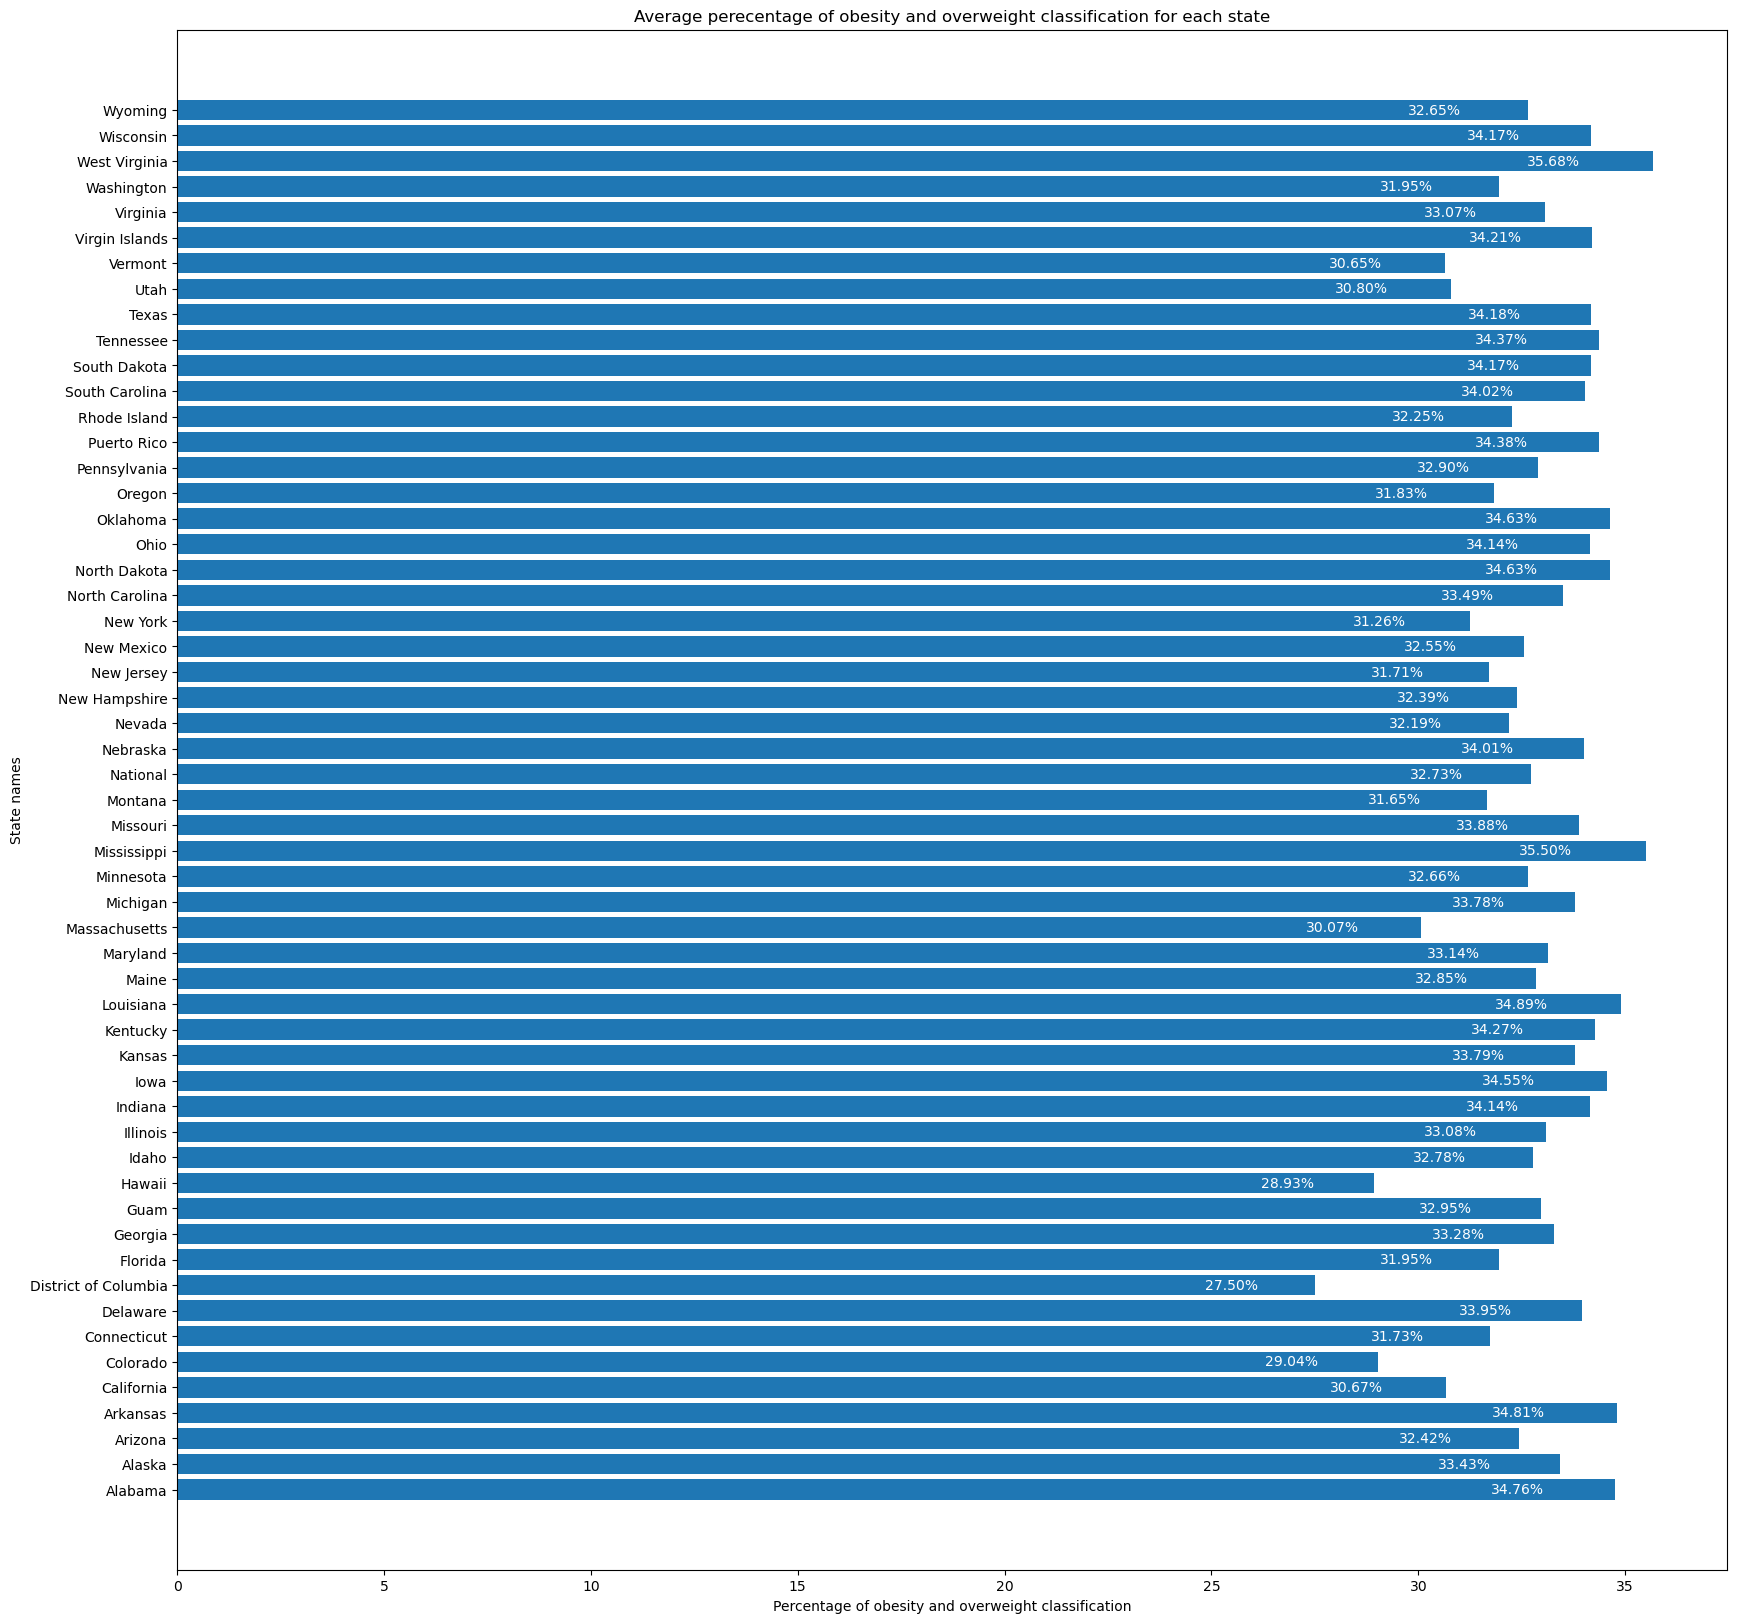

In [10]:
#plotting average percentage of obesity and overweight classification for each state
plt.figure(figsize=(20,20)) 
plt.title("Average perecentage of obesity and overweight classification for each state")
plt.ylabel("State names")
plt.xlabel("Percentage of obesity and overweight classification")
#have exact value of the bar written in text
bars = plt.barh(unique_location,location_weighted_mean)
for bar in bars:
    plt.text(bar.get_width() - (bar.get_width() * 0.05),  
             bar.get_y() + bar.get_height() / 2,  
             f'{bar.get_width():.2f}%',  
             va='center', ha='right', color='white', fontsize=10)  

In [11]:
#Checking all the start years in the data and sorting the year
unique_year = brfss_obesity_and_overweight_data["YearStart"].unique()
unique_year = list(unique_year)
unique_year.sort()
unique_year

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [12]:
#filter out the data by year in chronological order
year_dataset = []
for year in unique_year:
    year_dataset.append( brfss_obesity_and_overweight_data[brfss_obesity_and_overweight_data["YearStart"]==year])
#year_dataset #to print the dataset


In [13]:
#weighted average using sample size and percentage of people with obesity and overweight classification by year
year_weighted_mean = []
for year_data in year_dataset:
    weighted_year_average = (year_data["Data_Value"] * year_data["Sample_Size"]).sum()
    total_people_year = year_data["Sample_Size"].sum()
    percentage_people_year = weighted_year_average/total_people_year
    year_weighted_mean.append(percentage_people_year)


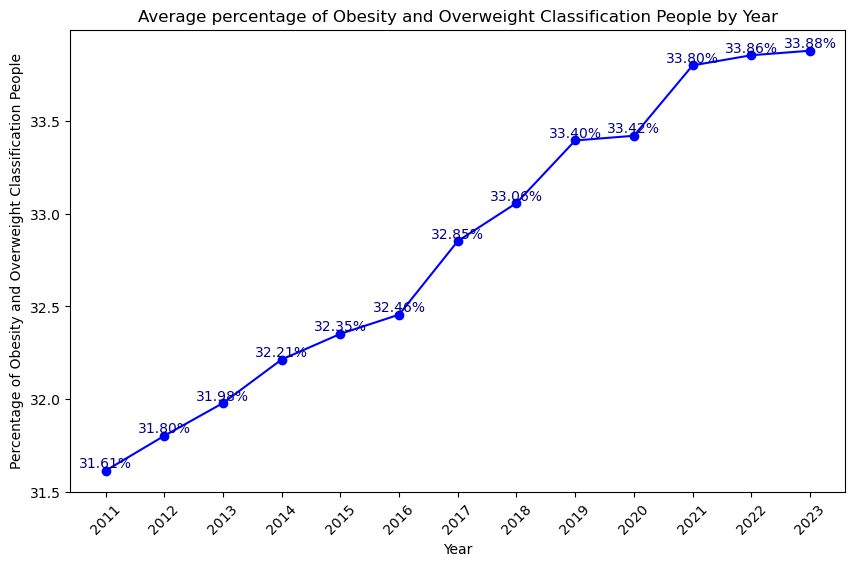

In [14]:
#plot the average percentage of obesity and overweight classification people by year
plt.figure(figsize=(10, 6))  
plt.plot(unique_year, year_weighted_mean, marker='o', linestyle='-', color='b') 
plt.title('Average percentage of Obesity and Overweight Classification People by Year')  
plt.xlabel('Year')
plt.ylabel('Percentage of Obesity and Overweight Classification People') 
plt.xticks(unique_year, labels=[str(year) for year in unique_year], rotation=45)

# have text for each value
for i, value in enumerate(year_weighted_mean):
    plt.text(unique_year[i], value, f'{value:.2f}%', ha='center', va='bottom', color='darkblue')




In [15]:
#loading UCMR-5 dataset
#UCMR dataset is not useful right now since it is 2023-2025 values
ucmr_5_dataset = pd.read_csv(r"C:\Users\idhan\Downloads\pfas_health_issues\data\UMR-5DatasetCSV.csv")

In [16]:
# #trying toinner join and merge UMR-5 dataset with the BRFSS weight dataset but it did not work due to memory issues
# ucmr_5_brfss_weight_dataset = pd.merge(brfss_dataset,ucmr_5_dataset, left_on='LocationAbbr', right_on='State', how='inner')


In [17]:
# #tried to merge just the overweight dataset points with the UMR-5 which did not work either
# ucmr_5_brfss_weight_dataset = pd.merge(brfss_obesity_and_overweight_data,ucmr_5__dataset, left_on='LocationAbbr', right_on='State', how='inner')


In [18]:
#loading UCMR-3 dataset (2013-2015)
ucmr_3_dataset = pd.read_csv(r"C:\Users\idhan\Downloads\pfas_health_issues\data\UCMR-3DatasetCSV.csv")

In [19]:
#filtering out state values 1 to 10 which are the Tribal water sources data
ucmr_3_dataset = ucmr_3_dataset[~ucmr_3_dataset['State'].isin([f"{i:02}" for i in range(1,11)])]

In [20]:
# for debugging
# print(ucmr_3_dataset.dtypes)


In [21]:
ucmr_3_dataset["CollectionDate"]

2992       1/5/2015
2993       1/5/2015
2994       1/5/2015
2995       1/5/2015
2996       1/5/2015
             ...   
1048570    4/7/2015
1048571    4/7/2015
1048572    4/7/2015
1048573    4/7/2015
1048574    4/7/2015
Name: CollectionDate, Length: 1045583, dtype: object

In [22]:
#convert the Collection Date into a datetime format
ucmr_3_dataset['CollectionDate'] = pd.to_datetime(ucmr_3_dataset['CollectionDate'], errors='coerce')


In [23]:
# print(ucmr_3_dataset["CollectionDate"].dtypes)


In [24]:
# print(ucmr_3_dataset.loc[:,"CollectionDate"].dtype)


In [25]:
#extracting the year for each row from the Collection Date
ucmr_3_dataset["CollectionYear"] = ucmr_3_dataset["CollectionDate"].dt.year

In [26]:
# to save a csv file with the collection year
# ucmr_3_dataset.to_csv(r'C:\Users\idhan\Downloads\pfas_health_issues\data\ucmr_3_dataset_with_collection_year.csv')

In [27]:
#list of pfas values we want from the dataset
pfas_values = ["PFBS", "PFHxS", "PFOA", "PFOS", "PFNA", "PFHpA"]


In [28]:
#filters out data of the PFAS collection
ucmr_3_dataset = ucmr_3_dataset[ucmr_3_dataset["Contaminant"].isin(pfas_values)]


In [29]:
#add 0s for missing Analytical Result Value
ucmr_3_dataset["AnalyticalResultValue"] = ucmr_3_dataset["AnalyticalResultValue"].fillna(0)

In [30]:
#finding the average of analytical result value for each PFAS contaminant for each state and each year
ucmr_3_preprocessed_dataset = (
    ucmr_3_dataset.groupby(['State', 'CollectionYear', 'Contaminant'], as_index=False)
        .agg({'AnalyticalResultValue': 'mean'})
)

In [31]:
#printing to verify if the preprocessed dataset looks as expected
#ucmr_3_preprocessed_dataset


In [32]:
#converting the preprocessed ucmr_3 dataset into a csv file
ucmr_3_preprocessed_dataset.to_csv(r'C:\Users\idhan\Downloads\pfas_health_issues\data\ucmr_3_preprocessed_data.csv')

In [40]:
#finding the average obesity and overweight value respectively for each state in each specific year
brfss_preprocessed_obesity_and_overweight_data = (brfss_obesity_and_overweight_data.groupby(["LocationDesc","Question","YearStart"],as_index = False).agg({'Data_Value':'mean'}))

In [43]:
#converting the preprocessed brfss dataset into a csv file
brfss_preprocessed_obesity_and_overweight_data.to_csv(r'C:\Users\idhan\Downloads\pfas_health_issues\data\brfss_preprocessed_obesity_and_overweight_data.csv')